'\n##表示展示结果后注释掉的代码\n'

'\n#发现count列的数值差异很大，\n最大值和最小值相差很多。\n为了进一步观察，\n我们可以绘制一份散点图矩阵来看下。\n\n'

"\nfig = plt.figure()\nax1 = fig.add_subplot(121)\nax2 = fig.add_subplot(122)\n\nsns.distplot(train_data_withoutoutliers['count'],ax=ax1)\nax1.set(title='Distribution of count without outliers')\nax1.set_xticks(range(0,1200,200))\n\nsns.distplot(train_data['count'],ax=ax2)\nax2.set(title='Distribution of count')\nax1.set_xticks(range(0,1200,200))\n"

"\n'''\n3.4 windspeed列处理\n这里我们使用随机森林对训练集中windspeed值为0的数据进行回补。\n'''\n"

RandomForestRegressor(n_estimators=1000, random_state=42)

D:\Coding\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'\n3.5 测试集数据处理\n对训练集数据进行处理之后，我们同样需要对测试集进行数据清洗，需要注意的一点就是测试集我们不能删除数据，不然提交结果时会出错。\n\n先来看下测试集数据的散点图矩阵\n'

"\n#测试集中没有count列\nsns.pairplot(test_data[['temp','atemp','humidity','windspeed']])\n"

"\ntry:\n    X_train = windspeed1_data[windspeed_columns].values\nexcept KeyError:\n    print ('catch an exception')\n"

RandomForestRegressor(n_estimators=1000, random_state=42)

D:\Coding\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>


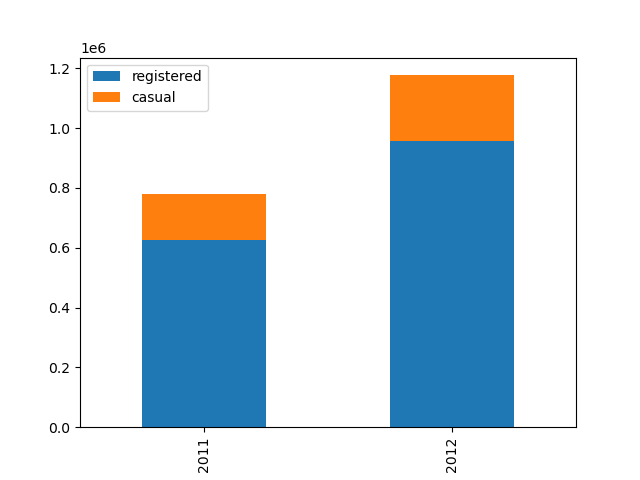

<AxesSubplot:xlabel='year'>

'\n4.0 数据分析与可视化\n'

<IPython.core.display.Javascript object>


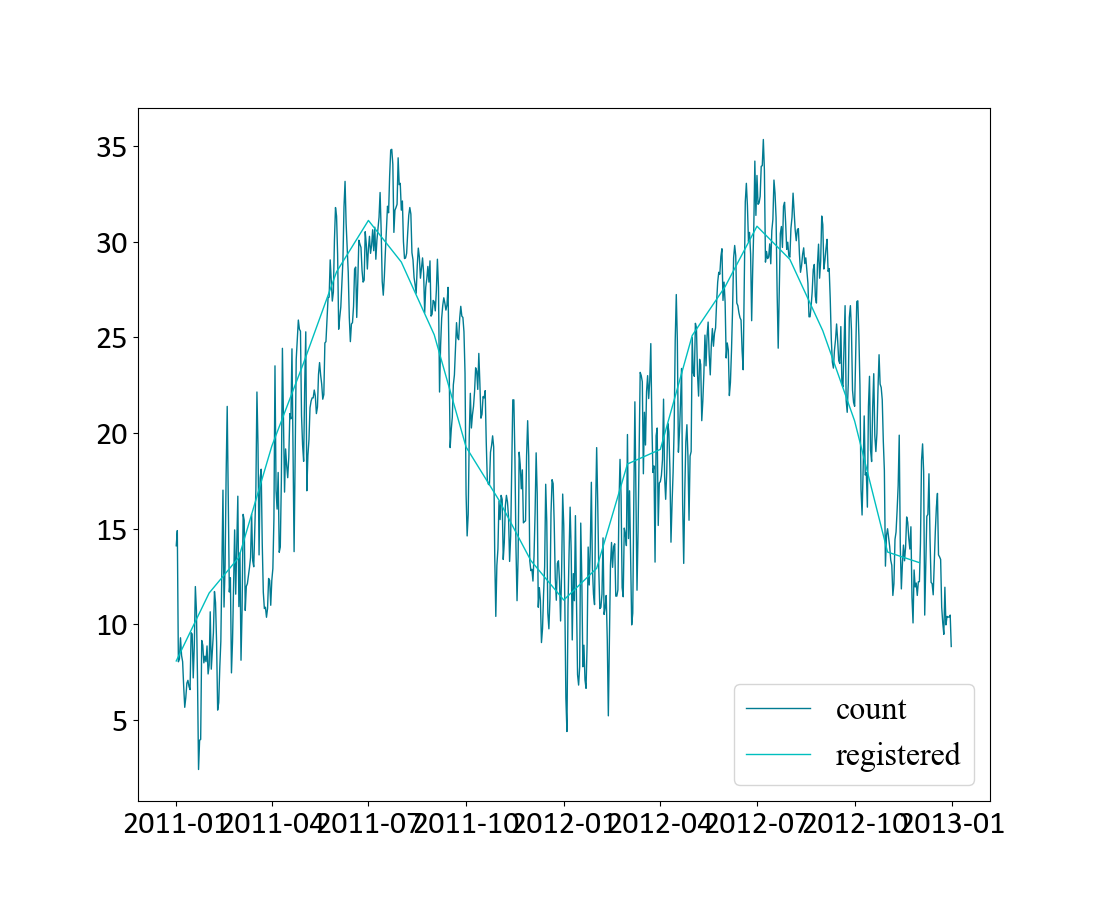

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
# coding: utf-8

# In[ ]:
'''
##表示展示结果后注释掉的代码
'''
#设置jupyter可以多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'



#让在jupyter绘图可以自由拖拽，实时显示坐标的魔术方法
get_ipython().magic('matplotlib notebook')

# 导入相关库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# 读取数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#train_data.shape
#test_data.shape

##train_data[:5]#展示数据

#首先将datetime列进行拆分，方便后续的处理与分析。

#训练集datetime列处理
train_data['date']=train_data['datetime'].map(lambda x:parse(x).date())
train_data['year']=train_data['datetime'].map(lambda x:parse(x).year)
train_data['month']=train_data['datetime'].map(lambda x:parse(x).month)
train_data['hour']=train_data['datetime'].map(lambda x:parse(x).hour)
train_data['weekday']=train_data['datetime'].map(lambda x:parse(x).isoweekday())

#测试集datetime列处理
test_data['date']=test_data['datetime'].map(lambda x:parse(x).date())
test_data['year']=test_data['datetime'].map(lambda x:parse(x).year)
test_data['month']=test_data['datetime'].map(lambda x:parse(x).month)
test_data['hour']=test_data['datetime'].map(lambda x:parse(x).hour)
test_data['weekday']=test_data['datetime'].map(lambda x:parse(x).isoweekday())


#检查训练集集有无缺失数据
##train_data.info()

#检查训练集有无重复数据
##train_data.duplicated().value_counts()

#训练集和测试集都没有缺失值和重复值。
#先来看下训练集中的数值型数据情况
##train_data[['temp','atemp','humidity','windspeed','casual','registered','count']].describe()


'''
#发现count列的数值差异很大，
最大值和最小值相差很多。
为了进一步观察，
我们可以绘制一份散点图矩阵来看下。

'''

##sns.pairplot(train_data[['temp','atemp','humidity','windspeed','count']])

##3.1 atemp列处理
##len(train_data[(train_data['temp']-train_data['atemp'])>10])

#atemp列异常数据的量只有24个，数据量不大，可以直接剔除。
train_data = train_data[(train_data['temp']-train_data['atemp'])<=10]

##3.2 humidity列处理
##len(train_data[train_data['humidity']==0])

#humidity列值为0的数据量共22个，也是可以直接剔除。
train_data = train_data[train_data['humidity']!=0]

#3.3 count列处理
#剔除极端值
train_data_withoutoutliers = train_data[np.abs(train_data['count'] - train_data['count'].mean()) < (3 * train_data['count'].std())]

#去除异常值之后再看下count列的分布
'''
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(train_data_withoutoutliers['count'],ax=ax1)
ax1.set(title='Distribution of count without outliers')
ax1.set_xticks(range(0,1200,200))

sns.distplot(train_data['count'],ax=ax2)
ax2.set(title='Distribution of count')
ax1.set_xticks(range(0,1200,200))
'''
#数据偏斜依旧很严重，所以这里我们需要将count列进行对数转换，减小波动。
train_data = train_data_withoutoutliers
train_data['count_log'] = np.log(train_data['count'])

"""
'''
3.4 windspeed列处理
这里我们使用随机森林对训练集中windspeed值为0的数据进行回补。
'''
"""



#2
train_data['windspeed_rfr'] = train_data['windspeed']

#将训练集数据分为风速值为0和不为0两部分
windspeed0_data = train_data[train_data['windspeed_rfr']==0]
windspeed1_data = train_data[train_data['windspeed_rfr']!=0]

#设定训练集数据
windspeed_columns = ['season','weather','temp','atemp','humidity','year','month','hour']
X_train = windspeed1_data[windspeed_columns].values
y_train = windspeed1_data['windspeed_rfr'].values

#生成回归器并进行拟合
windspeed_rfr = RandomForestRegressor(n_estimators=1000,random_state=42)
windspeed_rfr.fit(X_train,y_train)

#预测风速值
X_test = windspeed0_data[windspeed_columns].values
windspeed_pred = windspeed_rfr.predict(X_test)

#将预测值填充到风速为0的数据中，并将两个df合并
windspeed0_data['windspeed_rfr'] = windspeed_pred
train_data = pd.concat([windspeed0_data,windspeed1_data]).sort_values('datetime')
#2


'''
3.5 测试集数据处理
对训练集数据进行处理之后，我们同样需要对测试集进行数据清洗，需要注意的一点就是测试集我们不能删除数据，不然提交结果时会出错。

先来看下测试集数据的散点图矩阵
'''

'''
#测试集中没有count列
sns.pairplot(test_data[['temp','atemp','humidity','windspeed']])
'''
#windspeed列仍有大量值为0的异常数据，和训练集一样，我们使用随机森林对测试集windspeed值为0的数据进行回补。

test_data['windspeed_rfr'] = test_data['windspeed']

#将测试集数据分为风速值为0和不为0两部分
windspeed0_data = test_data[test_data['windspeed_rfr']==0]
windspeed1_data = test_data[test_data['windspeed_rfr']!=0]

#设定训练集数据

windspeed_columns = ['season','weather','temp','atemp','humidity','year','month','hour']
X_train = windspeed1_data[windspeed_columns].values
'''
try:
    X_train = windspeed1_data[windspeed_columns].values
except KeyError:
    print ('catch an exception')
'''

    

#判断变量

#print("{0}是{1}".format(X_train,getType(X_train)))

y_train = windspeed1_data['windspeed_rfr'].values

#生成回归器并进行拟合
windspeed_rfr = RandomForestRegressor(n_estimators=1000,random_state=42)
windspeed_rfr.fit(X_train,y_train)

#预测风速值
X_test = windspeed0_data[windspeed_columns].values
windspeed_pred = windspeed_rfr.predict(X_test)

#将预测值填充到风速为0的数据中，并将两个df合并
windspeed0_data['windspeed_rfr'] = windspeed_pred
test_data = pd.concat([windspeed0_data,windspeed1_data]).sort_values('datetime')

#按年份查看11和12年的自行车租赁总量
train_data.groupby(['year']).agg({'registered':'sum','casual':'sum'}).plot(kind='bar',stacked=True)
'''
4.0 数据分析与可视化
'''
#将训练集和测试集合并
bike_data = pd.concat([train_data,test_data],ignore_index=True)

#4.3
#按天对温度进行汇总，取一天气温的均数
temp_daily = bike_data.groupby(['date'],as_index=False).agg({'temp':'mean'})

#按月对温度进行汇总，取一月气温的均值
temp_monthly = bike_data.groupby(['year','month'],as_index=False).agg({'weekday':'min','temp':'mean'})
temp_monthly.rename(columns={'weekday':'day'},inplace=True)
temp_monthly['date'] = pd.to_datetime(temp_monthly[['year','month','day']])


#数据设置

x1 = temp_daily['date']
y1=temp_daily['temp']

x2=temp_monthly['date']
y2=temp_monthly['temp']


#设置输出的图片大小

figsize = 11,9

figure, ax = plt.subplots(figsize=figsize)

#在同一幅图片上画两条折线

A,=plt.plot(x1,y1,'#017b92',label='count',linewidth=1.0)

B,=plt.plot(x2,y2,'c',label='registered',linewidth=1.0)


#设置图例并且设置图例的字体及大小

font1 = {'family' : 'Calibri',

'weight' : 100,

'size'  : 23,

}

font3 = {'family' : 'Times New Roman',

'weight' : 'normal',

'size'  : 23,

}

# legend = plt.legend(handles=[A,B],prop=font1)

legend = plt.legend(handles=[A,B],prop=font3)

#设置坐标刻度值的大小以及刻度值的字体

plt.tick_params(labelsize=23)

labels = ax.get_xticklabels() + ax.get_yticklabels()

[label.set_fontname('Calibri') for label in labels]

#设置横纵坐标的名称以及对应字体格式

font2 = {'family' : 'Times New Roman',

'weight' : 'normal',

'size'  : 30,

}

# plt.xlabel('hour',font2)

# plt.ylabel('num',font2)

#将文件保存至文件中并且画出图